In [1]:
# 匯入所需的模組
from sklearn import tree  # 匯入決策樹模型
from sklearn.datasets import load_iris  # 匯入鳶尾花資料集
from sklearn.model_selection import train_test_split  # 匯入資料切分工具

# 讀入鳶尾花資料集
iris = load_iris()  # 載入鳶尾花資料集
iris_data = iris.data  # 取得特徵資料（花萼長度、花萼寬度、花瓣長度、花瓣寬度）
iris_label = iris.target  # 取得目標標籤（花的種類）

# 切分訓練資料與測試資料（70% 訓練、30% 測試）
train_data, test_data, train_label, test_label = train_test_split(
    iris_data, iris_label, test_size=0.3
)

# 建立決策樹分類器
clf = tree.DecisionTreeClassifier()  # 建立分類器物件
iris_clf = clf.fit(train_data, train_label)  # 用訓練資料訓練分類器

# 輸出模型在訓練資料上的準確率
print("訓練資料正確率:", clf.score(train_data, train_label))

# 輸出模型在測試資料上的準確率
print("測試資料正確率:", clf.score(test_data, test_label))

# 使用模型預測測試資料的結果
predict = clf.predict(test_data)

# 輸出測試資料的正確答案
print("標準答案:", test_label)

# 輸出模型預測的結果
print("預測答案:", predict)


訓練資料正確率: 1.0
測試資料正確率: 0.9111111111111111
標準答案: [2 1 1 1 2 1 2 2 1 0 1 0 0 2 1 1 2 2 1 1 2 0 2 0 2 0 1 2 0 2 2 0 2 1 1 0 1
 0 0 0 1 2 0 0 2]
預測答案: [2 1 1 1 2 1 2 2 1 0 1 0 0 2 1 1 2 1 1 1 2 0 2 0 1 0 1 2 0 1 2 0 2 1 1 0 1
 0 0 0 1 1 0 0 2]


In [2]:
import graphviz  # 匯入 graphviz 套件，用來視覺化決策樹

# 將訓練好的決策樹轉換成 DOT 格式的資料（Graphviz 使用的描述語言）
dot_data = tree.export_graphviz(clf, out_file=None)

# 用 Graphviz 將 DOT 資料轉換成圖形
graph = graphviz.Source(dot_data)

# 將決策樹圖形輸出並儲存為 PDF 檔案，檔名為 "iris.pdf"
graph.render("iris")


'iris.pdf'

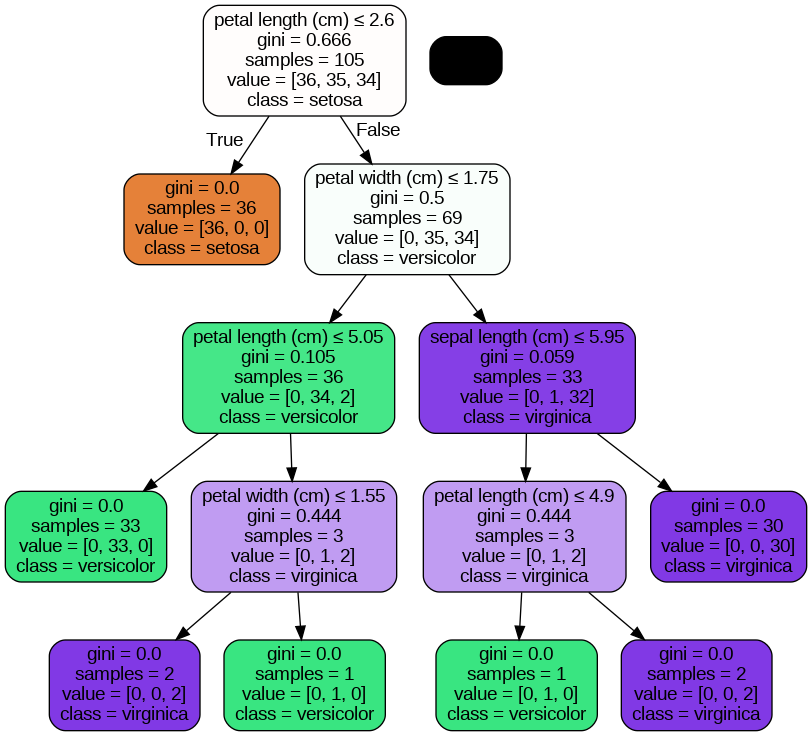

In [3]:
import pydotplus  # 匯入 pydotplus 套件，用來將 DOT 格式轉為圖形物件
from IPython.display import Image  # 匯入 Image，能在 Jupyter Notebook 中顯示圖片

# 將決策樹模型轉換成 DOT 語法的文字資料，
# 並加上一些參數來美化圖形：
# - feature_names：顯示特徵名稱（例如花瓣長度等）
# - class_names：顯示類別名稱（例如 setosa、versicolor、virginica）
# - filled：節點會用顏色區分不同類別
# - rounded：節點的邊角呈圓角
# - special_characters：允許特殊字元（可改善顯示效果）
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# 將 dot 格式的文字資料轉換成圖形物件（使用 pydotplus）
graph = pydotplus.graph_from_dot_data(dot_data)

# 將圖形轉換為 PNG 格式並顯示在 Jupyter Notebook 裡
Image(graph.create_png())
